In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
diabetes = pd.read_csv('diabetes.csv')

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
diabetes.shape

(768, 9)

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

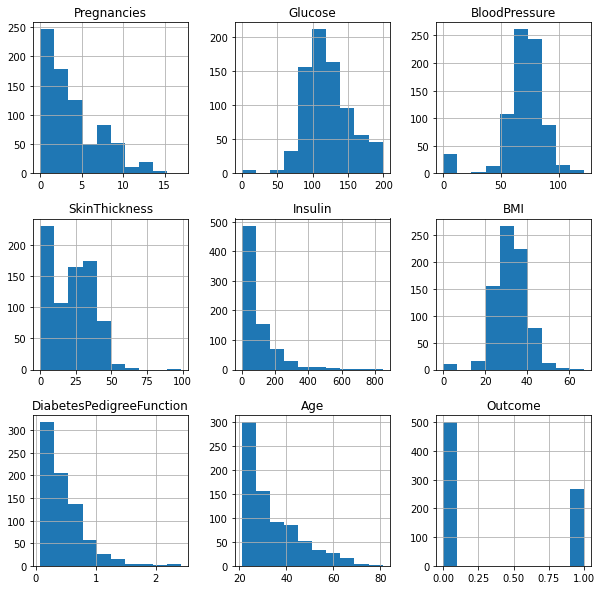

In [7]:
histo = diabetes.hist(figsize = (10,10))

[]

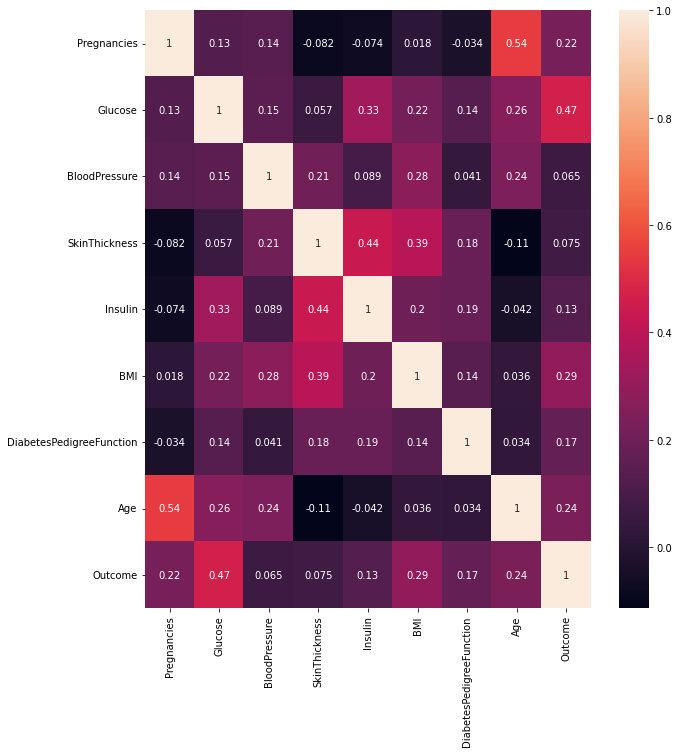

In [8]:
plt.figure(figsize=(10,11))
sns.heatmap(diabetes.corr(),annot=True)
plt.plot()

In [9]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# diabetes.isnull().values.all()
# diabetes.isnull().values.any()

# Data Preprocessing 

In [11]:
X = diabetes.drop('Outcome', axis = 1)
y = diabetes['Outcome']

In [12]:
from sklearn.preprocessing import LabelEncoder

L_E = LabelEncoder()

y = L_E.fit_transform(y)
y

X = np.array(X)
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [13]:
train_data, test_data, train_label, test_label = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [14]:
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_data = sc.fit_transform(train_data)
test_data = sc.fit_transform(test_data)

# Machine Learning Models

# Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(train_data ,train_label)

predicted_nb = nb.predict(test_data)
predicted_nb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [17]:
cm_naive = metrics.confusion_matrix(test_label, predicted_nb)
cm_naive

array([[128,  18],
       [ 32,  53]])

In [18]:
accuracy_nb = metrics.accuracy_score(test_label, predicted_nb)*100
accuracy_nb

78.35497835497836

# K-Nearest Neighbor

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_data, train_label)

KNeighborsClassifier()

In [20]:
predicted_knn = knn.predict(test_data)
predicted_knn

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [21]:
cm_knn = metrics.confusion_matrix(test_label, predicted_knn)
cm_knn

array([[133,  13],
       [ 35,  50]])

In [22]:
accuracy_knn = metrics.accuracy_score(test_label, predicted_knn)*100
accuracy_knn

79.22077922077922

# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_data, train_label)

DecisionTreeClassifier()

In [24]:
predicted_dt = dt.predict(test_data)
predicted_dt

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [25]:
accuracy_dt = metrics.accuracy_score(test_label, predicted_dt)*100
accuracy_dt

67.53246753246754

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(train_data, train_label)

LogisticRegression()

In [27]:
predicted_lr = lr.predict(test_data)
predicted_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [28]:
cm_knn = metrics.confusion_matrix(test_label, predicted_lr)
cm_knn

array([[132,  14],
       [ 37,  48]])

In [29]:
accuracy_lr = metrics.accuracy_score(test_label, predicted_lr)*100
accuracy_lr

77.92207792207793

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train_data, train_label)

RandomForestClassifier()

In [31]:
predicted_rf = rf.predict(test_data)
predicted_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [32]:
cm_rf = metrics.confusion_matrix(test_label, predicted_rf)
cm_rf

array([[132,  14],
       [ 34,  51]])

In [33]:
accuracy_rf = metrics.accuracy_score(test_label, predicted_rf)*100
accuracy_rf

79.22077922077922

# Linear Discriminant Analysis

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(train_data, train_label)

LinearDiscriminantAnalysis()

In [35]:
predicted_lda = lda.predict(test_data)
predicted_lda

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [36]:
cm_lda = metrics.confusion_matrix(test_label, predicted_lda)
cm_lda

array([[132,  14],
       [ 37,  48]])

In [37]:
accuracy_lda = metrics.accuracy_score(test_label, predicted_lda)*100
accuracy_lda

77.92207792207793

# SVC

In [54]:
from sklearn.svm import SVC

svc = SVC(probability= True)
svc.fit(train_data, train_label)

SVC(probability=True)

In [55]:
predicted_svc = svc.predict(test_data)
predicted_svc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [56]:
cm_svc = metrics.confusion_matrix(test_label, predicted_svc)
cm_svc

array([[137,   9],
       [ 37,  48]])

In [57]:
accuracy_svc = metrics.accuracy_score(test_label, predicted_svc)*100
accuracy_svc

80.08658008658008

# Evaluation

In [42]:
print("Accuracy of Naive Bayes is ", accuracy_nb)
print("Accuracy of K-Nearest Neighbor is ", accuracy_knn)
print("Accuracy of Decision Tree is ", accuracy_dt)
print("Accuracy of Logistic Regression is ", accuracy_lr)
print("Accuracy of Random Forest is ", accuracy_rf)
print("Accuracy of Linear Discriminant Analysis is ", accuracy_lda)
print("Accuracy of Support Vector Machine is ", accuracy_svc)

Accuracy of Naive Bayes is  78.35497835497836
Accuracy of K-Nearest Neighbor is  79.22077922077922
Accuracy of Decision Tree is  67.53246753246754
Accuracy of Logistic Regression is  77.92207792207793
Accuracy of Random Forest is  79.22077922077922
Accuracy of Linear Discriminant Analysis is  77.92207792207793
Accuracy of Support Vector Machine is  80.08658008658008


In [43]:
print("Precision, Recall and f1-score of Naive Bayes:")
print(classification_report(test_label, predicted_nb))

Precision, Recall and f1-score of Naive Bayes:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.75      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



In [44]:
print("Precision, Recall and f1-score of K-Nearesr Neighbor: ")
print(classification_report(test_label, predicted_knn))

Precision, Recall and f1-score of K-Nearesr Neighbor: 
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       146
           1       0.79      0.59      0.68        85

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



In [45]:
print("Precision, Recall and f1-score of Decision Tree: ")
print(classification_report(test_label, predicted_dt))

Precision, Recall and f1-score of Decision Tree: 
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       146
           1       0.56      0.52      0.54        85

    accuracy                           0.68       231
   macro avg       0.65      0.64      0.64       231
weighted avg       0.67      0.68      0.67       231



In [46]:
print("Precision, Recall and f1-score of Logistic Regression: ")
print(classification_report(test_label, predicted_lr))

Precision, Recall and f1-score of Logistic Regression: 
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.56      0.65        85

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.75       231
weighted avg       0.78      0.78      0.77       231



In [47]:
print("Precision, Recall and f1-score of Random Forest: ")
print(classification_report(test_label, predicted_rf))

Precision, Recall and f1-score of Random Forest: 
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       146
           1       0.78      0.60      0.68        85

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231



In [48]:
print("Precision, Recall and f1-score of Linear Discriminant Analysis: ")
print(classification_report(test_label, predicted_lda))

Precision, Recall and f1-score of Linear Discriminant Analysis: 
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.56      0.65        85

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.75       231
weighted avg       0.78      0.78      0.77       231



In [49]:
print("Precision, Recall and f1-score of SVM: ")
print(classification_report(test_label, predicted_svc))

Precision, Recall and f1-score of SVM: 
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       146
           1       0.84      0.56      0.68        85

    accuracy                           0.80       231
   macro avg       0.81      0.75      0.77       231
weighted avg       0.81      0.80      0.79       231



In [51]:
y_prob = knn.predict_proba(test_data)

macro_roc_auc_ovo = roc_auc_score(test_label, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    test_label, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(test_label, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    test_label, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

NameError: ignored

In [58]:
# predict probabilities
pred_prob1 = nb.predict_proba(test_data)
pred_prob2 = knn.predict_proba(test_data)
pred_prob3 = svc.predict_proba(test_data)
pred_prob4 = lr.predict_proba(test_data)
pred_prob5 = lda.predict_proba(test_data)
pred_prob6 = dt.predict_proba(test_data)
pred_prob7 = rf.predict_proba(test_data)

In [59]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(test_label, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(test_label, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(test_label, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(test_label, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(test_label, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(test_label, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(test_label, pred_prob7[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_label))]
p_fpr, p_tpr, _ = roc_curve(test_label, random_probs, pos_label=1)

In [61]:

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(test_label, pred_prob1[:,1])
auc_score2 = roc_auc_score(test_label, pred_prob2[:,1])
auc_score3 = roc_auc_score(test_label, pred_prob3[:,1])
auc_score4 = roc_auc_score(test_label, pred_prob4[:,1])
auc_score5 = roc_auc_score(test_label, pred_prob5[:,1])
auc_score6 = roc_auc_score(test_label, pred_prob6[:,1])
auc_score7 = roc_auc_score(test_label, pred_prob7[:,1])

print("AUC score for Naive Bayes", auc_score1)
print("AUC score for K-Neighbors", auc_score2)
print("AUC score for SVM", auc_score3)
print("AUC score for Logistic Regression", auc_score4)
print("AUC score for Linear Discriminant Analysis", auc_score5)
print("AUC score for Decision Tree", auc_score6)
print("AUC score for Random Forest", auc_score7)

AUC score for Naive Bayes 0.8268331990330379
AUC score for K-Neighbors 0.8035858178887993
AUC score for SVM 0.8689766317485899
AUC score for Logistic Regression 0.8635777598710717
AUC score for Linear Discriminant Analysis 0.8641418211120065
AUC score for Decision Tree 0.6423851732473811
AUC score for Random Forest 0.8702659145850121


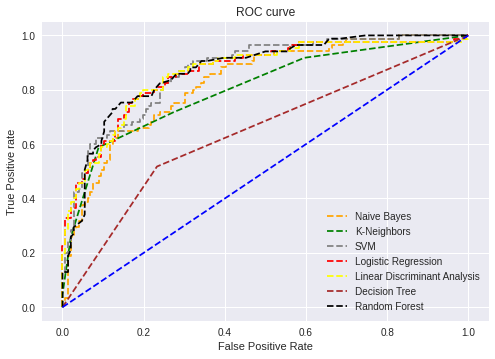

In [62]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='K-Neighbors')
plt.plot(fpr3, tpr3, linestyle='--',color='grey', label='SVM')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='Linear Discriminant Analysis')
plt.plot(fpr6, tpr6, linestyle='--',color='brown', label='Decision Tree')
plt.plot(fpr7, tpr7, linestyle='--',color='black', label='Random Forest')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();